In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#data with noise
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 20)
y_true = 2 * x + 5  # True relationship: y = 2x + 5
noise = np.random.normal(0, 2, size=len(x))  # Add normal noise
y = y_true + noise

In [ ]:
#data
print("Sample data points:")
for i in range(5):  # Show first 5 points
    print(f"Point {i+1}: x = {x[i]:.2f}, y = {y[i]:.2f}")

Sample data points:
Point 1: x = 0.00, y = 5.99
Point 2: x = 0.53, y = 5.78
Point 3: x = 1.05, y = 8.40
Point 4: x = 1.58, y = 11.20
Point 5: x = 2.11, y = 8.74


In [4]:
# Manual calculation of least squares
def least_squares_manual(x, y):
    n = len(x)
    # Calculate the means
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate the slope (b1)
    numerator = sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y))
    denominator = sum((x_i - x_mean)**2 for x_i in x)
    slope = numerator / denominator
    
    # Calculate the intercept (b0)
    intercept = y_mean - slope * x_mean
    
    # Calculate R-squared
    y_pred = slope * x + intercept
    ss_total = sum((y_i - y_mean)**2 for y_i in y)
    ss_residual = sum((y_i - y_pred_i)**2 for y_i, y_pred_i in zip(y, y_pred))
    r_squared = 1 - (ss_residual / ss_total)
    
    return slope, intercept, r_squared

In [ ]:
# Calculate using our manual method
slope_manual, intercept_manual, r_squared_manual = least_squares_manual(x, y)
print("\nManual calculation results:")
print(f"Slope (β₁) = {slope_manual:.4f}")
print(f"Intercept (β₀) = {intercept_manual:.4f}")
print(f"R² = {r_squared_manual:.4f}")


Manual calculation results:
Slope (β₁) = 1.6217
Intercept (β₀) = 6.5491
R² = 0.9173


In [6]:
# Calculate using scipy.stats for comparison
slope_scipy, intercept_scipy, r_value, p_value, std_err = stats.linregress(x, y)
print("\nSciPy calculation results:")
print(f"Slope (β₁) = {slope_scipy:.4f}")
print(f"Intercept (β₀) = {intercept_scipy:.4f}")
print(f"R² = {r_value**2:.4f}")

# Calculate residuals
y_pred = slope_manual * x + intercept_manual
residuals = y - y_pred

# Calculate sum of squared residuals
ssr = np.sum(residuals**2)
print(f"\nSum of squared residuals = {ssr:.4f}")


SciPy calculation results:
Slope (β₁) = 1.6217
Intercept (β₀) = 6.5491
R² = 0.9173

Sum of squared residuals = 43.6768


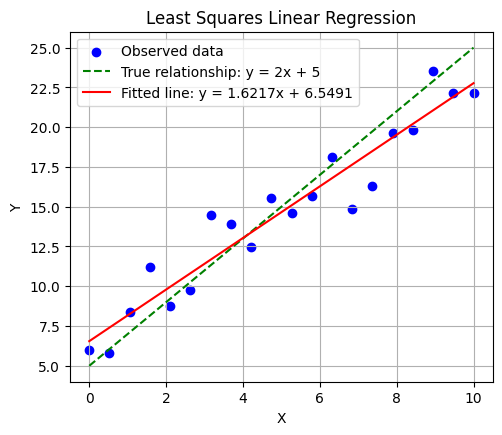

In [8]:
# Visualization
plt.figure(figsize=(12, 10))

# Plot 1: Original data and fitted line
plt.subplot(2, 2, 1)
plt.scatter(x, y, color='blue', label='Observed data')
plt.plot(x, y_true, 'g--', label='True relationship: y = 2x + 5')
plt.plot(x, y_pred, 'r-', label=f'Fitted line: y = {slope_manual:.4f}x + {intercept_manual:.4f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Squares Linear Regression')
plt.legend()
plt.grid(True)

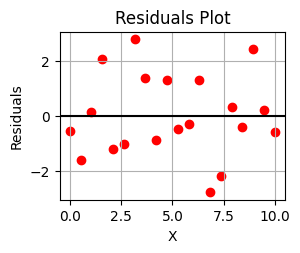

In [9]:
# Plot 2: Residuals
plt.subplot(2, 2, 2)
plt.scatter(x, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)

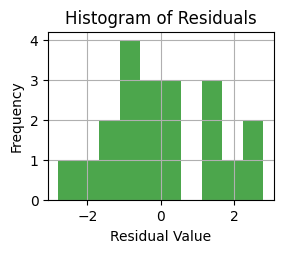

In [10]:
# Plot 3: Residuals histogram
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=10, color='green', alpha=0.7)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)

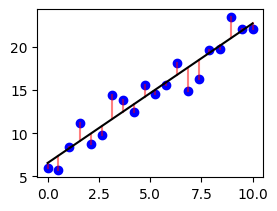

In [11]:
# Plot 4: Visualization of squared residuals
plt.subplot(2, 2, 4)
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], 'r-', alpha=0.5)
    
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, 'k-', label='Regression line')


/var/folders/qb/my_74k5x5nb9_k8vjb5_bykc0000gn/T/ipykernel_6628/1355094114.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


OSError: [Errno 30] Read-only file system: 'least_squares_visualization.png'

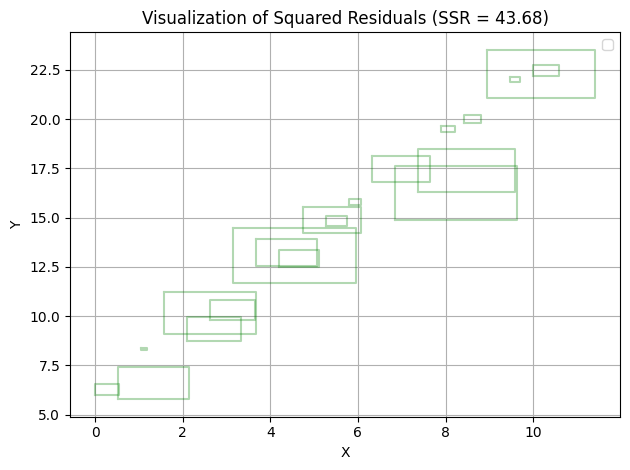

In [12]:
# Draw squares for the squared residuals
for i in range(len(x)):
    x_coord = x[i]
    y_coord = y[i]
    y_pred_i = y_pred[i]
    plt.plot([x_coord, x_coord, x_coord+abs(residuals[i]), x_coord+abs(residuals[i]), x_coord], 
             [y_coord, y_pred_i, y_pred_i, y_coord, y_coord], 
             'g-', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Visualization of Squared Residuals (SSR = {ssr:.2f})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('least_squares_visualization.png')
plt.show()